In [10]:
from algorithms.apdrcd import apdrcd
from algorithms.sa_apdrcd import sa_apdrcd

import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

import sys
import os

### MNIST

In [41]:
from sklearn.datasets import fetch_openml
digits = fetch_openml(name='mnist_784', version=1)
data = digits.data.to_numpy()
plt.imshow(data[0].reshape(28,28), cmap=plt.cm.gray_r)
plt.show()

KeyboardInterrupt: 

In [83]:
print(data.shape)
N = data.shape[0]
tmp = np.arange(N)
np.random.seed(111)
np.random.shuffle(tmp)
i,j = tmp[0:2]

(70000, 784)


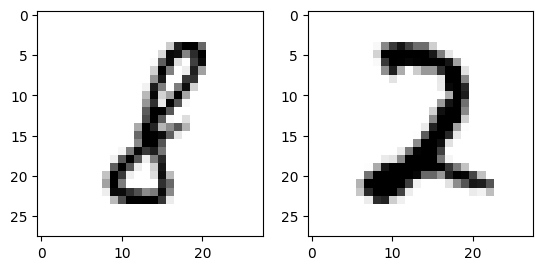

In [84]:
plt.subplot(1,2,1)
plt.imshow(data[i].reshape(28,28), cmap=plt.cm.gray_r)
plt.subplot(1,2,2)
plt.imshow(data[j].reshape(28,28), cmap=plt.cm.gray_r)
plt.show()

In [21]:
r = data[i]
l = data[j]
ns = r.shape[0]
nt = l.shape[0]
C = np.zeros((28,28))
for i in range(28):
    for j in range(28):
        C[i][j] = np.abs(i-j)

NameError: name 'data' is not defined

#### Uniformly random numbers

In [11]:
ns = 100
nt = 100

np.random.seed(101)
r = np.random.rand(ns)
np.random.seed(102)
l = np.random.rand(nt)
r = r / np.sum(r)
l = l / np.sum(l)
np.random.seed(111)
C = 10*np.random.rand(ns,nt)

In [12]:
eta = 1
maxIter = 4000

In [13]:
x1 = np.zeros(ns*nt)
x2 = np.zeros(ns*nt)
ii = np.arange(maxIter)
err1 = []
err2 = []
time1 = []
time2 = []
ot1 = []
ot2 = []

In [14]:
# x1, err1, time1, ot1 = apdrcd(r, l, C, eta, maxIter, err_flag=1, time_flag=1, value_flag=1)
x1, err1, time1 = apdrcd(r, l, C, eta, maxIter, err_flag=1, time_flag=1, value_flag=1)

In [15]:
# x2, err2, time2, ot2 = sa_apdrcd(r, l, C, eta, maxIter, err_flag=1, time_flag=1, value_flag=1)
x2, err2, time2 = sa_apdrcd(r, l, C, eta, maxIter, err_flag=1, time_flag=1, value_flag=1)

### Error - Iteration

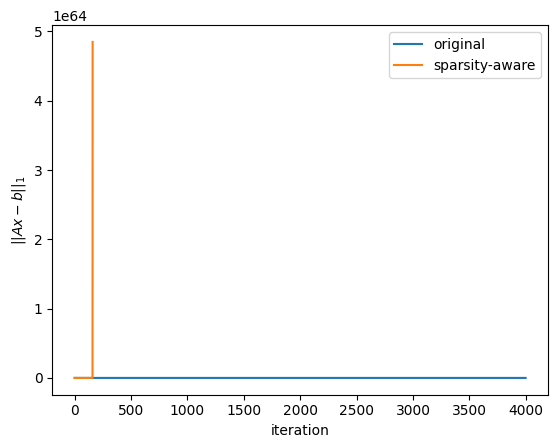

In [18]:
fig, ax = plt.subplots(facecolor="w")
ax.plot(ii, err1, label="original")
ax.plot(ii, err2, label="sparsity-aware")
ax.legend()
ax.set_xlabel("iteration")
ax.set_ylabel("$||Ax-b||_1$")
plt.show()

### Time (s) - Iteration

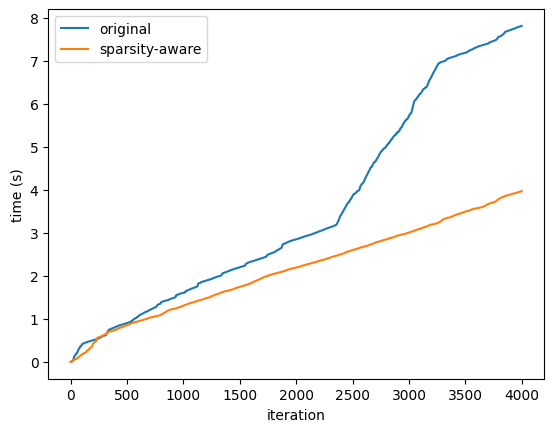

In [9]:
fig, ax = plt.subplots(facecolor="w")
ax.plot(ii, time1, label="original")
ax.plot(ii, time2, label="sparsity-aware")
ax.legend()
ax.set_xlabel("iteration")
ax.set_ylabel("time (s)")
plt.show()

### OT-value - Iteration

In [ ]:
# fig, ax = plt.subplots(facecolor="w")
# ax.plot(ii, ot1, label="original")
# # ax.plot(ii, ot2, label="sparsity-aware")
# ax.legend()
# ax.set_xlabel("iteration")
# ax.set_ylabel("ot_value")
# plt.show()

### Transport Matrix

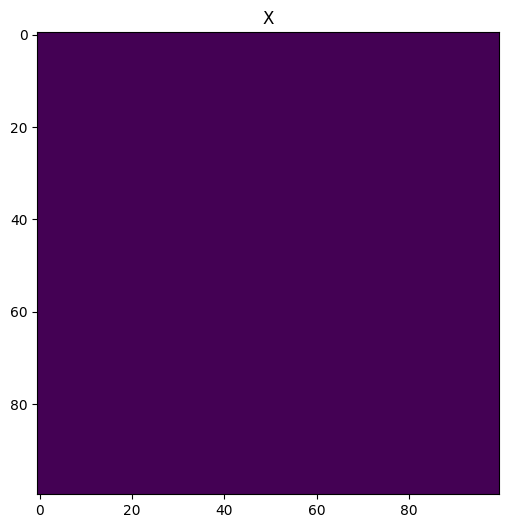

In [10]:
x1 = np.ones(ns*nt)
X = np.reshape(x1, [ns,nt])

fig = plt.figure(figsize=(8,6))
plt.imshow(X)
plt.title("X")
plt.show()

In [12]:
X

array([[1., 1., 1., ..., 1., 1., 1.],
       [1., 1., 1., ..., 1., 1., 1.],
       [1., 1., 1., ..., 1., 1., 1.],
       ...,
       [1., 1., 1., ..., 1., 1., 1.],
       [1., 1., 1., ..., 1., 1., 1.],
       [1., 1., 1., ..., 1., 1., 1.]])